## Loading some packages that will be used throughout.

In [1]:
# Knitr package for its kable function (makes html, latex, or markdown tables)
library(knitr)

# Load tidyverse metapackage
library(tidyverse)

# Load tidymodels metapackage
library(tidymodels)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Exploratory analysis 

## Convert R "Iris" data set to data frame.

In [3]:
iris_df <- as.data.frame(iris)

## We will start by looking at the structure of our data set.

## Using the base R `str()` function:

In [4]:
str(iris_df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


## Using `glimpse()` tidyverse function:

In [8]:
glimpse(iris_df)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


In [7]:
summary(iris_df)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## Look at pairwise correlations between variables using the base function `plot()`

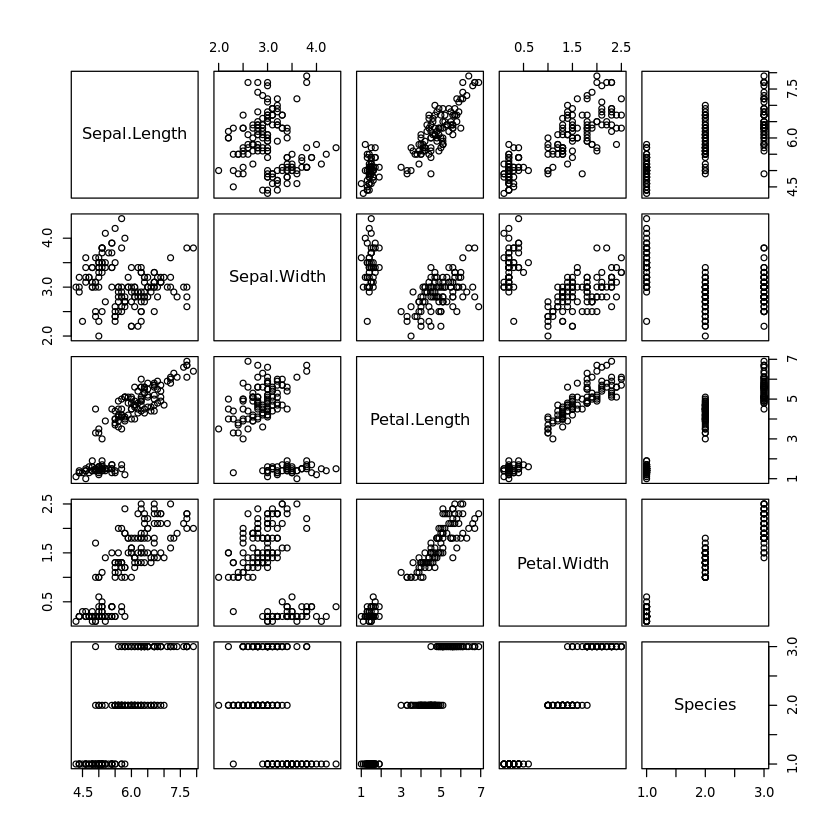

In [6]:
plot(iris_df)

## Using `pairs()`

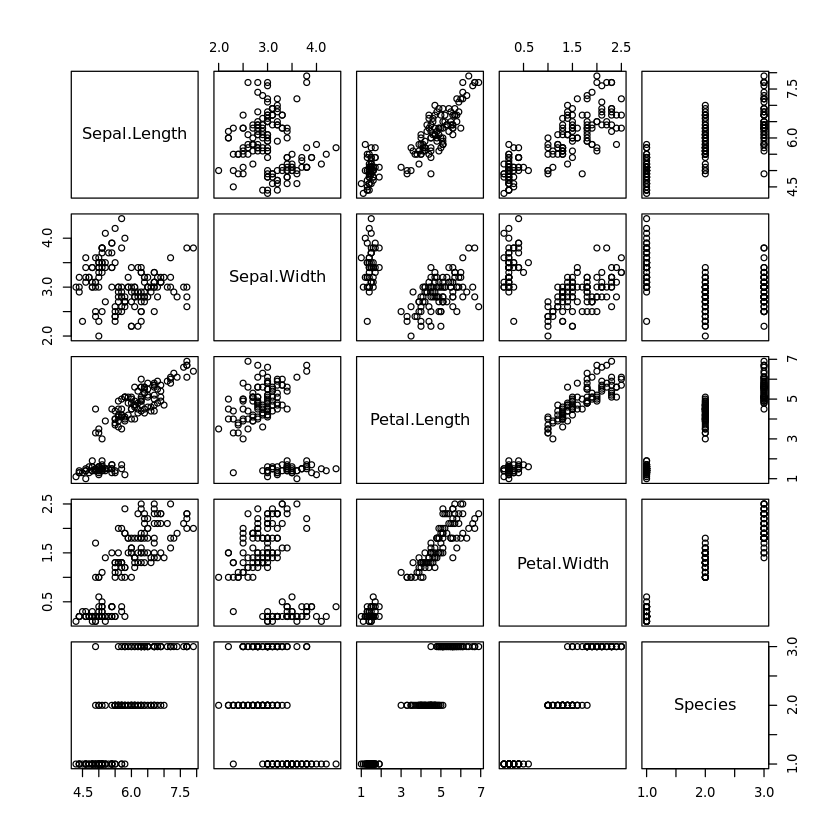

In [9]:
pairs(iris_df)

## Colored points by Species factor:

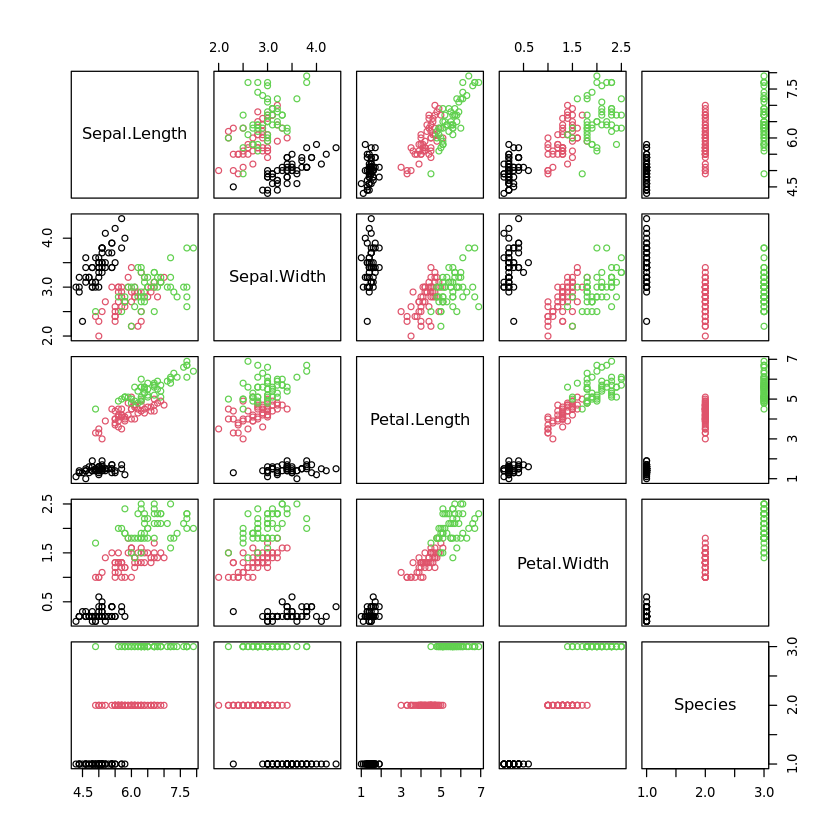

In [8]:
pairs(iris_df, col=iris_df$Species)

# Adding a caption to the same plot:

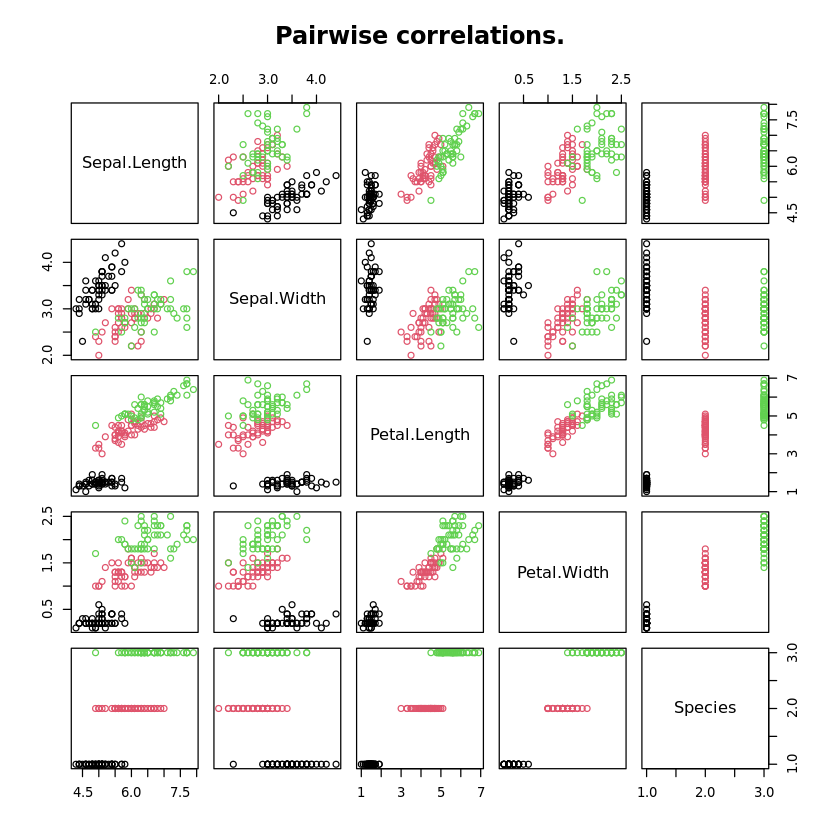

In [5]:
fig.cap ="Pairwise correlations."
pairs(iris_df, col=iris_df$Species, main=fig.cap)

## Look the distribution of  a variable

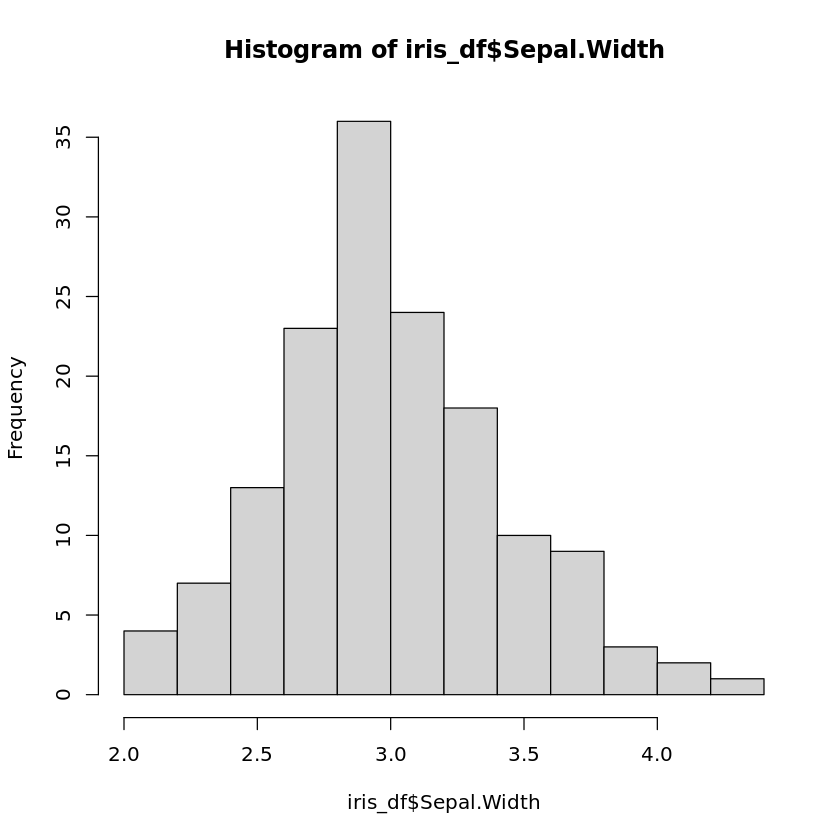

In [10]:
hist(iris_df$Sepal.Width)


## Adding proper labels and a title

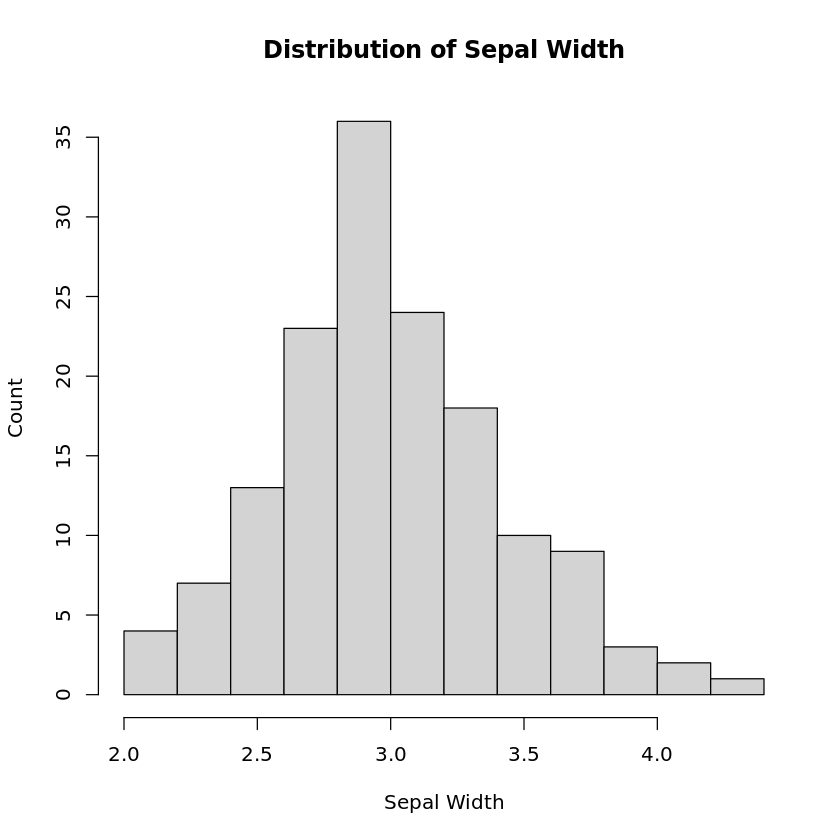

In [11]:
hist(iris_df$Sepal.Width, main="Distribution of Sepal Width",
     xlab="Sepal Width", ylab="Count")

## Same plot using `ggplot` from the tidyverse

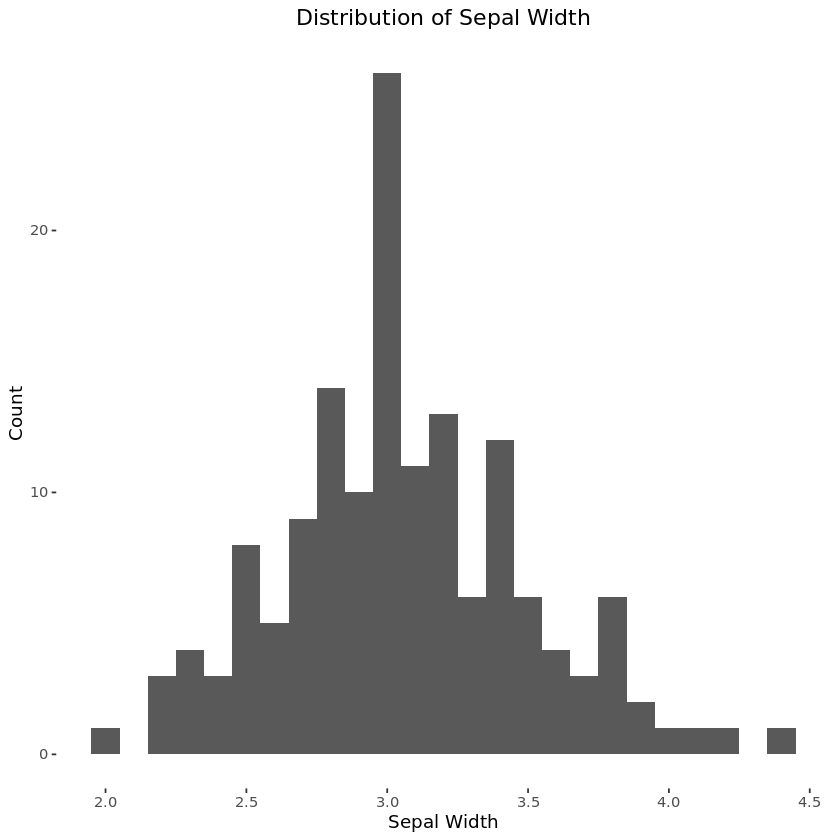

In [27]:
hist_plt <- ggplot(iris_df, aes(x=Sepal.Width)) +
              geom_histogram(binwidth=.1) +
              xlab("Sepal Width") + ylab("Count") +
              ggtitle("Distribution of Sepal Width") +
              theme(panel.background=element_blank(),
                    plot.title=element_text(hjust=0.5))
hist_plt

## Sometimes data may need to be reformatted from a wide format to a long format

In [10]:

# Frost add unique id to each row
iris_df$ID <- rownames(iris_df)

# Use pivot_longer to convert from wide to long format 
iris_long <-  iris_df %>%
              pivot_longer(c(Sepal.Length, Sepal.Width, Petal.Length,
                             Petal.Width))
print(iris_long)

# A tibble: 600 × 4
   Species ID    name         value
   <fct>   <chr> <chr>        <dbl>
 1 setosa  1     Sepal.Length   5.1
 2 setosa  1     Sepal.Width    3.5
 3 setosa  1     Petal.Length   1.4
 4 setosa  1     Petal.Width    0.2
 5 setosa  2     Sepal.Length   4.9
 6 setosa  2     Sepal.Width    3  
 7 setosa  2     Petal.Length   1.4
 8 setosa  2     Petal.Width    0.2
 9 setosa  3     Sepal.Length   4.7
10 setosa  3     Sepal.Width    3.2
# … with 590 more rows


## Now we can use ggplot and the long format of the data to build a faceted plot.

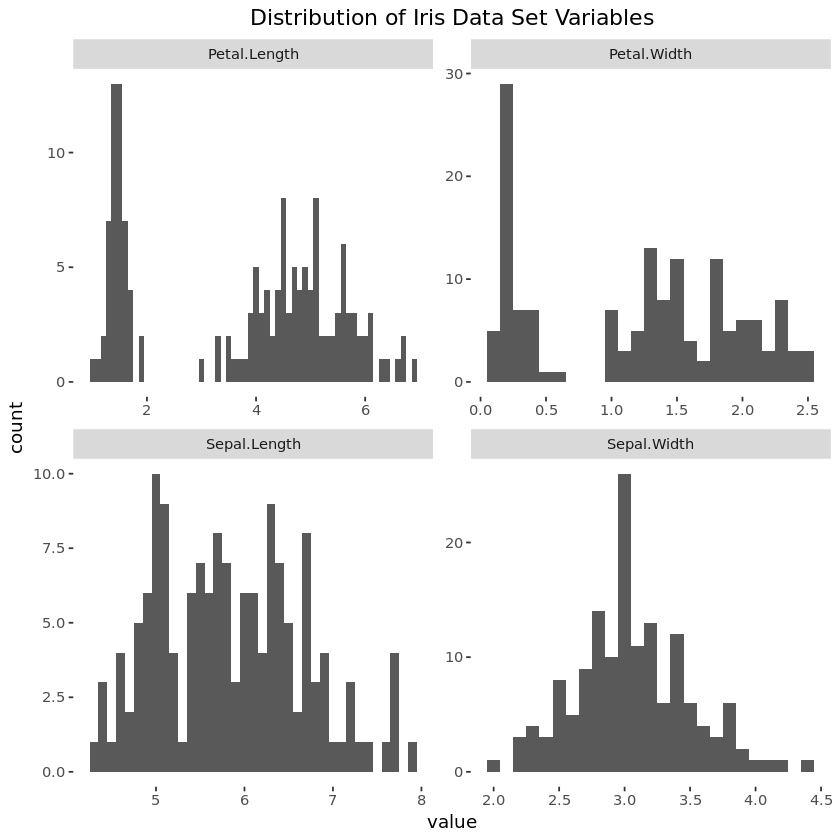

In [26]:
fancy_hist_plt <- ggplot(iris_long, aes(x=value)) +
                geom_histogram(binwidth=.1) +
                facet_wrap(~name, scale="free") +
                ggtitle("Distribution of Iris Data Set Variables") +
                theme(panel.background=element_blank(),
                    plot.title=element_text(hjust=0.5))
fancy_hist_plt

Print a summary of the variables in iris

In [12]:
summary(iris_df)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species        ID           
 setosa    :50   Length:150        
 versicolor:50   Class :character  
 virginica :50   Mode  :character  
                                   
                                   
                                   

## Create a table of summary statistics for a Sepal.Length by species

In [16]:
stats_tbl <- iris_df %>%
               group_by(Species) %>%
               summarize(`Sepal Length Mean`=mean(Sepal.Length),
                         `Sepal Length SD`=sd(Sepal.Length),
                         `Sepal Length Min`=min(Sepal.Length, na.rm=T),
                         `Sepal Length Max`=max(Sepal.Length, na.rm=T))

kable(stats_tbl)



|Species    | Sepal Length Mean| Sepal Length SD| Sepal Length Min| Sepal Length Max|
|:----------|-----------------:|---------------:|----------------:|----------------:|
|setosa     |             5.006|       0.3524897|              4.3|              5.8|
|versicolor |             5.936|       0.5161711|              4.9|              7.0|
|virginica  |             6.588|       0.6358796|              4.9|              7.9|

# Data transformations

## Sometimes it may be necessary to transform a numeric variable. For example, adding a new variable that is the log of another variable.

In [13]:
iris_df2 <- iris_df %>%
             mutate(Sepal.Length.log = log(Sepal.Length))
glimpse(iris_df2)

Rows: 150
Columns: 7
$ Sepal.Length     <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4…
$ Sepal.Width      <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7…
$ Petal.Length     <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5…
$ Petal.Width      <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2…
$ Species          <fct> setosa, setosa, setosa, setosa, setosa, setosa, setos…
$ ID               <chr> "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "1…
$ Sepal.Length.log <dbl> 1.629241, 1.589235, 1.547563, 1.526056, 1.609438, 1.6…


## Other times you may want to take a numeric variable and convert it into a factor based on ranges. This can be achieved using `cut()`.

In [14]:
iris_df3 <- iris_df %>%
             arrange(Sepal.Length) %>% # Sort by Sepal.Length first
             mutate(Sepal.Length.class=cut(Sepal.Length, 3,
                                           labels=c("Short", "Medium",
                                                    "Long")))
glimpse(iris_df3)

Rows: 150
Columns: 7
$ Sepal.Length       <dbl> 4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4…
$ Sepal.Width        <dbl> 3.0, 2.9, 3.0, 3.2, 2.3, 3.1, 3.4, 3.6, 3.2, 3.2, 3…
$ Petal.Length       <dbl> 1.1, 1.4, 1.3, 1.3, 1.3, 1.5, 1.4, 1.0, 1.4, 1.3, 1…
$ Petal.Width        <dbl> 0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0…
$ Species            <fct> setosa, setosa, setosa, setosa, setosa, setosa, set…
$ ID                 <chr> "14", "9", "39", "43", "42", "4", "7", "23", "48", …
$ Sepal.Length.class <fct> Short, Short, Short, Short, Short, Short, Short, Sh…


# Fitting and summarizing models

## This is an example of fitting a model usin `lm()`

In [16]:
fit1 <- lm(Sepal.Length ~ Sepal.Width + Species + Petal.Length,
           data=iris_df)

## The model object fit1 is a special list object

In [17]:
str(fit1)

List of 13
 $ coefficients : Named num [1:5] 2.39 0.432 -0.956 -1.394 0.776
  ..- attr(*, "names")= chr [1:5] "(Intercept)" "Sepal.Width" "Speciesversicolor" "Speciesvirginica" ...
 $ residuals    : Named num [1:150] 0.111 0.1271 -0.0818 -0.2937 -0.0323 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ effects      : Named num [1:150] -71.566 -1.188 0.279 8.525 3.747 ...
  ..- attr(*, "names")= chr [1:150] "(Intercept)" "Sepal.Width" "Speciesversicolor" "Speciesvirginica" ...
 $ rank         : int 5
 $ fitted.values: Named num [1:150] 4.99 4.77 4.78 4.89 5.03 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ assign       : int [1:5] 0 1 2 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:150, 1:5] -12.2474 0.0816 0.0816 0.0816 0.0816 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:5] "(Intercept)" "Sepal.Width" "Speciesversicolor" "Speciesvirginica" ...
  .. ..- attr(*, "assign")= int [1:5] 0 1 2 2

## Elements of the model can be retrieved using the `$` operator 

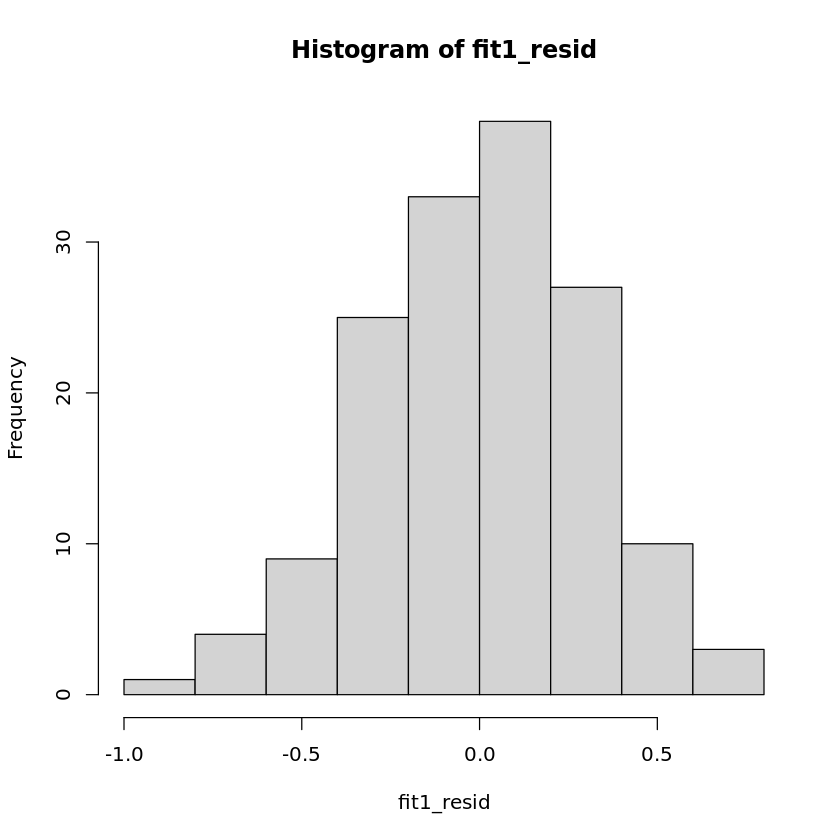

In [18]:
# Get residuals
fit1_resid <- fit1$residuals
hist(fit1_resid)

## Alternatively built-in functions exist for retrieving information from R model objects.

In [19]:
# Get residuals
fit1_resid <- resid(fit1)
glimpse(fit1_resid)

# Get fitted values
fit1_fitted <- fitted(fit1)
glimpse(fit1_fitted)

# Get hat matrix  value
fit1_hatvalues <- hatvalues(fit1)
glimpse(fit1_hatvalues)

# Overall summary of model
summary(fit1)

 Named num [1:150] 0.111 0.1271 -0.0818 -0.2937 -0.0323 ...
 - attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 Named num [1:150] 4.99 4.77 4.78 4.89 5.03 ...
 - attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 Named num [1:150] 0.0207 0.0317 0.0232 0.028 0.0226 ...
 - attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...



Call:
lm(formula = Sepal.Length ~ Sepal.Width + Species + Petal.Length, 
    data = iris_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82156 -0.20530  0.00638  0.22645  0.74999 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.39039    0.26227   9.114 5.94e-16 ***
Sepal.Width        0.43222    0.08139   5.310 4.03e-07 ***
Speciesversicolor -0.95581    0.21520  -4.442 1.76e-05 ***
Speciesvirginica  -1.39410    0.28566  -4.880 2.76e-06 ***
Petal.Length       0.77563    0.06425  12.073  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3103 on 145 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8595 
F-statistic: 228.9 on 4 and 145 DF,  p-value: < 2.2e-16


## The tidymodels metapackage loads the broom package, which has some useful functions for summarizing a model. 

## The function `tidy()` returns information about model components

In [20]:
tidy(fit1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.3903891,0.26226815,9.114294,5.942826e-16
Sepal.Width,0.4322172,0.08138982,5.310458,4.025982e-07
Speciesversicolor,-0.9558123,0.21519853,-4.441537,1.759999e-05
Speciesvirginica,-1.3940979,0.28566053,-4.880261,2.759618e-06
Petal.Length,0.7756295,0.06424566,12.072869,1.151112e-23


## The function `glance()` reports model info and diagnostics

In [28]:
glance(fit1)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8633088,0.859538,0.3103448,228.9463,1.395029e-61,4,-34.78746,81.57492,99.63873,13.96551,145,150


## The function `augment` adds information from the model to the initial data set.

In [29]:
glimpse(augment(fit1, iris_df))

Rows: 150
Columns: 12
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…
$ ID           <chr> "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", …
$ .fitted      <dbl> 4.989031, 4.772922, 4.781803, 4.893707, 5.032252, 5.39460…
$ .resid       <dbl> 0.110969387, 0.127077992, -0.081802504, -0.293706675, -0.…
$ .hat         <dbl> 0.02070446, 0.03167492, 0.02318439, 0.02797278, 0.0226370…
$ .sigma       <dbl> 0.3112803, 0.3112345, 0.3113441, 0.3104295, 0.3114086, 0.…
$ .cooksd      <dbl> 5.520568e-04, 1.132804e-03, 3.376330e-04, 5.303315e-03, 5…
$ .std.resid   <dbl> 0.36132818, 0.41611683, -0.26669559, -0.95990916, -0.1051…


## An example of making a table that summarizes the information from several different models:

In [30]:
# Fit some additional models
fit2 <- lm(Sepal.Length ~ Sepal.Width + Species,
           data=iris_df)
fit3 <- lm(Sepal.Length ~ Sepal.Width,
           data=iris_df)

# Get a summary of each model
fit1_summary <- glance(fit1)
fit2_summary <- glance(fit2)
fit3_summary <- glance(fit3)

# Concatenate results into one table
mod_tbl <- rbind(fit1_summary, fit2_summary, fit3_summary)

# Add model labels 
mod_tbl$Model <- c("Fit1", "Fit2", "Fit3")

# Add Formula
mod_tbl$Formula <- c("~ Sepal.Width + Species + Petal.Length",
                     "~ Sepal.Width + Species",
                     "~Sepal.Width")

# Select specific information to display in table
mod_tbl <- mod_tbl %>%
            select(Model,
                   Formula,
                   adj.r.squared,
                   p.value,
                   AIC,
                   BIC)
# Create nice table using kable
kable(mod_tbl)




|Model |Formula                                | adj.r.squared|   p.value|       AIC|       BIC|
|:-----|:--------------------------------------|-------------:|---------:|---------:|---------:|
|Fit1  |~ Sepal.Width + Species + Petal.Length |     0.8595380| 0.0000000|  81.57492|  99.63873|
|Fit2  |~ Sepal.Width + Species                |     0.7202746| 0.0000000| 183.93657| 198.98975|
|Fit3  |~Sepal.Width                           |     0.0071593| 0.1518983| 371.99167| 381.02358|

# Cross validation

## The `predict()` function can be used to apply a model to new data to get predictions.

In [23]:
# Create some new data
new_data <- expand.grid(c("setosa", "versicolor", "virginica"),
                        c(2,3.6,4.2))
colnames(new_data) <- c("Species", "Sepal.Width")

# Use fit2 to predict the Sepal.Length of the new data
predict(fit2, new_data)

1        2        3        4        5        6        7        8 
3.858515 5.317258 5.805332 5.144212 6.602956 7.091029 5.626349 7.085092 
       9 
7.573166

## Now we will randomly partition our data into training and testing and use cross-validation to test how our model will perform in practice.

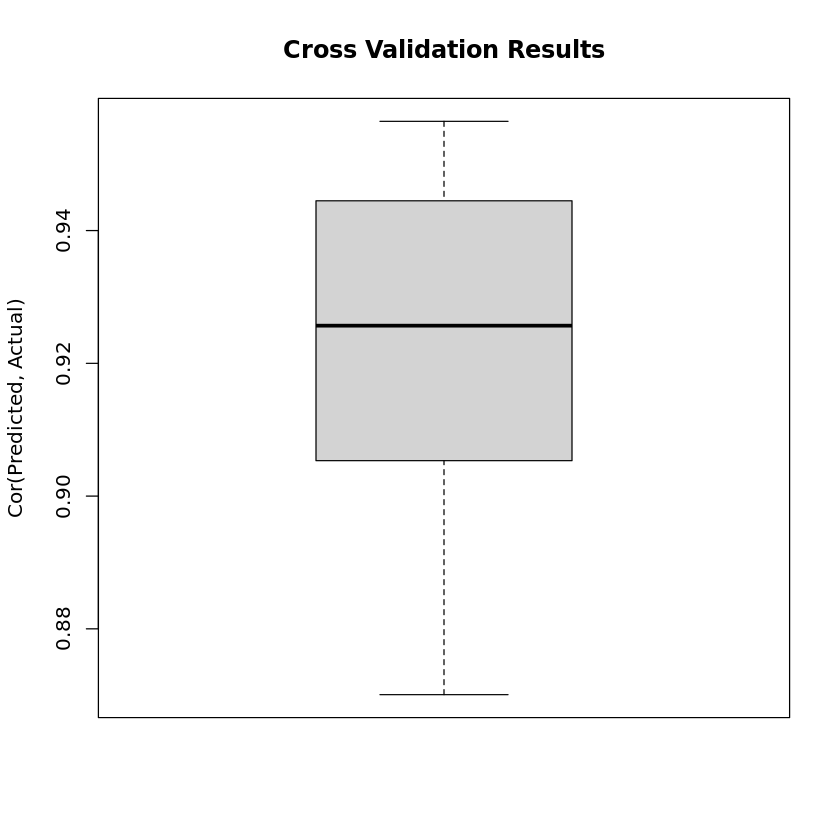

In [24]:
set.seed(123456)
cv_results <- data.frame()
for(i in 1:20){
  # Randomly assigning 20% of samples to test set
  test_indx <- sample(nrow(iris_df))[1:ceiling(0.2 * nrow(iris_df))]
  test_set <- iris_df[test_indx,]
  # Remove test set samples from original data to produce
  # the training set
  train_set <- iris_df[-test_indx,]
  # Fit model
  mod_fit <- lm(Sepal.Length ~ Sepal.Width + Petal.Length + 
               Petal.Width + Species, data=train_set)
  # Predict the test set
  pred_res <- predict(mod_fit, test_set[,2:5])
  # Correlate prediction with real values
  cv_cor <- cor(pred_res, test_set[,1])
  # Save results in a data frame
  cv_results <- rbind(cv_results, data.frame(Rep=i,
                                             CV_accuracy=cv_cor))
}

# Plot Results
boxplot(cv_results$CV_accuracy, main="Cross Validation Results",
        ylab="Cor(Predicted, Actual)")
